In [2]:
pip install pandas numpy matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load dataset
#df = pd.read_csv("titanic.csv")
#url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
#df = pd.read_csv(url)

df = pd.read_csv("https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv")
# Display first few rows
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:
print(df.isnull().sum())  # Count missing values in each column


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [18]:
# Drop 'Cabin' since it has too many missing values
df.drop(columns=['Cabin'], inplace=True)

# Fill missing 'Age' values with the median
df['Age'].fillna(df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with the most frequent value (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


In [19]:
# Get summary statistics
print(df.describe())  # Summary of numerical features

# Summary of categorical data
print(df[['Survived', 'Pclass', 'Sex', 'Embarked']].describe(include='object'))


       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  891.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.361582    0.523008   
std     257.353842    0.486592    0.836071   13.019697    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   22.000000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   35.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
         Sex Embarked
count    891      891
unique     2        3
top     male   

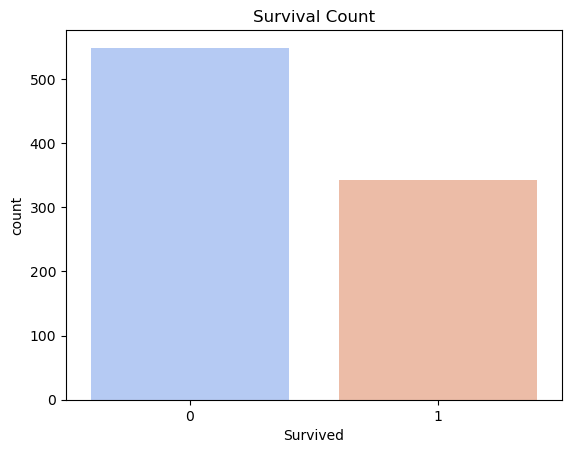

In [20]:
sns.countplot(data=df, x='Survived', palette="coolwarm")
plt.title("Survival Count")
plt.show()


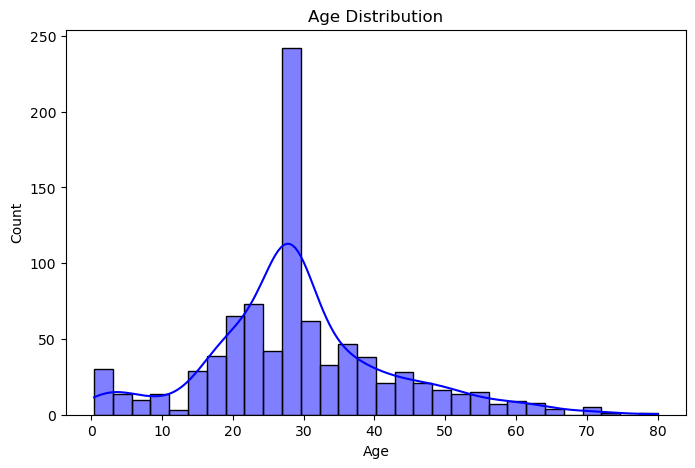

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


C:\Users\Hp\AppData\Local\Temp\ipykernel_5884\3094819449.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Pclass', y='Survived', ci=None, palette='viridis')


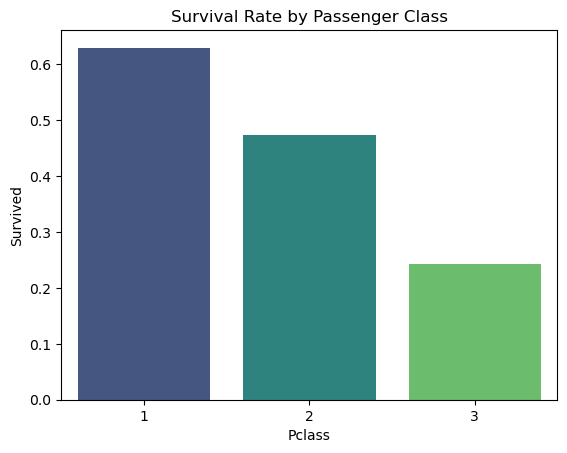

In [22]:
sns.barplot(data=df, x='Pclass', y='Survived', ci=None, palette='viridis')
plt.title("Survival Rate by Passenger Class")
plt.show()


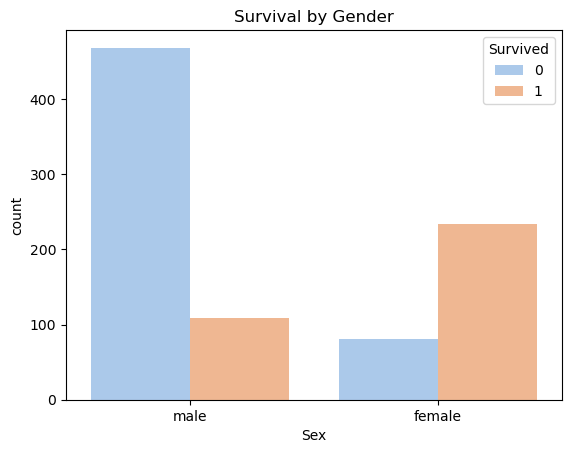

In [23]:
sns.countplot(data=df, x='Sex', hue='Survived', palette="pastel")
plt.title("Survival by Gender")
plt.show()


In [24]:
df.to_csv("cleaned_titanic.csv", index=False)
